# Task 6.6 End-to-end Time_series Analysis

<a id='0'></a> <br>
 # Table of Contents  

1. [Import Data and Libraries](#1)
1. [Subsetting, wrangling, and cleaning time-series data](#2)
1. [Time series analysis: decomposition](#3)
1. [Testing for stationarity](#4)
1. [Check the Autocorrelations](#5)

<a id='1'></a> <br>
## 1. Import Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # plot styling option

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'G:\My Drive\CareerFoundry\Python Projects\2024-3 Data Immersion Task 6.6'

In [9]:
# set # of rows and columns to show

pd.set_option('display.max_columns', 192)
pd.set_option('display.max_rows', 75)

In [4]:
# import latest df_sbs

data = pd.read_pickle(os.path.join(path, '02 Data', 'Original Data', 'df_sbs_v9.pkl'))

In [10]:
# check data

data.head(5)

,Player_Stats (Tm),Player_Stats (SB),Player_Stats (Key),Player_Stats (Player),Player_Stats (No.),Player_Stats (Age),Player_Stats (Pos),O/D/SPT,Player_Stats (College/Univ),Player_Stats (Univ_State),Player_Stats (BirthDate),Player_Stats (Yrs_Active),Player_Stats (Super_bowl),Player_Stats (Team),Player_Stats (Pts),Player_Stats (MVP),Player_Stats (Stadium),Player_Stats (City),Player_Stats (State),Player_Stats (Date),Player_Stats (W/L),O_Passing (Cmp),O_Passing (Att),O_Passing (Yds),O_Passing (TD),O_Passing (Int),O_Passing (Sk),O_Passing (-Yds),O_Passing (Lng),O_Passing (Rate),O_Rushing (Att),O_Rushing (Yds),O_Rushing (TD),O_Rushing (Lng),O_Receiving (Rec),O_Receiving (Yds),O_Receiving (TD),O_Receiving (Lng),O_Fumbles (Fmb),O_Fumbles (FL),D_Interceptions (Int),D_Interceptions (Yds),D_Interceptions (TD),D_Interceptions (Lng),D_Sacks (Sk),D_Tackles (Comb),D_Tackles (Solo),D_Tackles (Ast),D_Fumbles (FR),D_Fumbles (Yds),D_Fumbles (TD),D_Fumbles (FF),SPT_Kick_Returns (Rt),SPT_Kick_Returns (Yds),SPT_Kick_Returns (Y/Rt),SPT_Kick_Returns (TD),SPT_Kick_Returns (Lng),SPT_Punt_Returns (Ret),SPT_Punt_Returns (Yds),SPT_Punt_Returns (Y/R),SPT_Punt_Returns (TD),SPT_Punt_Returns (Lng),SPT_Scoring (XPM),SPT_Scoring (XPA),SPT_Scoring (FGM),SPT_Scoring (FGA),SPT_Punting (Pnt),SPT_Punting (Yds),SPT_Punting (Y/P),SPT_Punting (Lng),Unique_Key,Univ_Alum_per_Team,Univ_Alum_per_SB,Univ_Total_Rings,Univ_Total_Wins,Univ_Total_MVPs,State_Alum_per_Team,State_Alum_per_SB,State_Total_Rings,State_Total_Wins,State_Total_MVPs,Total_Wins_by_Team,Total_#_of_players,Alum_%,Avg_Player_Age_by_Team,Avg_Player_Yrs_by_Team,TEAM_O_Passing (Cmp),TEAM_O_Passing (Att),TEAM_O_Passing (Yds),TEAM_O_Passing (TD),TEAM_O_Passing (Int),TEAM_O_Passing (Sk),TEAM_O_Passing (-Yds),TEAM_O_Passing (Lng),TEAM_O_Passing (Rate),TEAM_O_Rushing (Att),TEAM_O_Rushing (Yds),TEAM_O_Rushing (TD),TEAM_O_Rushing (Lng),TEAM_O_Receiving (Rec),TEAM_O_Receiving (Yds),TEAM_O_Receiving (TD),TEAM_O_Receiving (Lng),TEAM_O_Fumbles (Fmb),TEAM_O_Fumbles (FL),TEAM_D_Interceptions (Int),TEAM_D_Interceptions (Yds),TEAM_D_Interceptions (TD),TEAM_D_Interceptions (Lng),TEAM_D_Sacks (Sk),TEAM_D_Tackles (Comb),TEAM_D_Tackles (Solo),TEAM_D_Tackles (Ast),TEAM_D_Fumbles (FR),TEAM_D_Fumbles (Yds),TEAM_D_Fumbles (TD),TEAM_D_Fumbles (FF),TEAM_SPT_Kick_Returns (Rt),TEAM_SPT_Kick_Returns (Yds),TEAM_SPT_Kick_Returns (Y/Rt),TEAM_SPT_Kick_Returns (TD),TEAM_SPT_Kick_Returns (Lng),TEAM_SPT_Punt_Returns (Ret),TEAM_SPT_Punt_Returns (Yds),TEAM_SPT_Punt_Returns (Y/R),TEAM_SPT_Punt_Returns (TD),TEAM_SPT_Punt_Returns (Lng),TEAM_SPT_Scoring (XPM),TEAM_SPT_Scoring (XPA),TEAM_SPT_Scoring (FGM),TEAM_SPT_Scoring (FGA),TEAM_SPT_Punting (Pnt),TEAM_SPT_Punting (Yds),TEAM_SPT_Punting (Y/P),TEAM_SPT_Punting (Lng),Rush_Att_Category,Univ_O_Passing (Cmp),Univ_O_Passing (Att),Univ_O_Passing (Yds),Univ_O_Passing (TD),Univ_O_Passing (Int),Univ_O_Passing (Sk),Univ_O_Passing (-Yds),Univ_O_Passing (Lng),Univ_O_Passing (Rate),Univ_O_Rushing (Att),Univ_O_Rushing (Yds),Univ_O_Rushing (TD),Univ_O_Rushing (Lng),Univ_O_Receiving (Rec),Univ_O_Receiving (Yds),Univ_O_Receiving (TD),Univ_O_Receiving (Lng),Univ_O_Fumbles (Fmb),Univ_O_Fumbles (FL),Univ_D_Interceptions (Int),Univ_D_Interceptions (Yds),Univ_D_Interceptions (TD),Univ_D_Interceptions (Lng),Univ_D_Sacks (Sk),Univ_D_Tackles (Comb),Univ_D_Tackles (Solo),Univ_D_Tackles (Ast),Univ_D_Fumbles (FR),Univ_D_Fumbles (Yds),Univ_D_Fumbles (TD),Univ_D_Fumbles (FF),Univ_SPT_Kick_Returns (Rt),Univ_SPT_Kick_Returns (Yds),Univ_SPT_Kick_Returns (Y/Rt),Univ_SPT_Kick_Returns (TD),Univ_SPT_Kick_Returns (Lng),Univ_SPT_Punt_Returns (Ret),Univ_SPT_Punt_Returns (Yds),Univ_SPT_Punt_Returns (Y/R),Univ_SPT_Punt_Returns (TD),Univ_SPT_Punt_Returns (Lng),Univ_SPT_Scoring (XPM),Univ_SPT_Scoring (XPA),Univ_SPT_Scoring (FGM),Univ_SPT_Scoring (FGA),Univ_SPT_Punting (Pnt),Univ_SPT_Punting (Yds),Univ_SPT_Punting (Y/P),Univ_SPT_Punting (Lng),Univ_Avg_Age_by_Team,Univ_Avg_Yrs_by_Team,Num_of_Univs,TEAM_total_yds,TEAM_total_tds,TEAM_total_turnover

In [6]:
data.shape

(6538, 191)

In [7]:
data.columns

Index(['Player_Stats (Tm)', 'Player_Stats (SB)', 'Player_Stats (Key)',
       'Player_Stats (Player)', 'Player_Stats (No.)', 'Player_Stats (Age)',
       'Player_Stats (Pos)', 'O/D/SPT', 'Player_Stats (College/Univ)',
       'Player_Stats (Univ_State)',
       ...
       'Univ_SPT_Punting (Pnt)', 'Univ_SPT_Punting (Yds)',
       'Univ_SPT_Punting (Y/P)', 'Univ_SPT_Punting (Lng)',
       'Univ_Avg_Age_by_Team', 'Univ_Avg_Yrs_by_Team', 'Num_of_Univs',
       'TEAM_total_yds', 'TEAM_total_tds', 'TEAM_total_turnovers'],
      dtype='object', length=191)

In [8]:
type(data)

pandas.core.frame.DataFrame

<a id='2'></a> <br>
## 2. Subsetting, wrangling, and cleaning time-series data

### Create a subset of my data

In [37]:
data_sub = data[['Player_Stats (SB)', 'Player_Stats (Key)', 'TEAM_O_Passing (Att)', 'TEAM_O_Rushing (Att)']].copy()

In [38]:
data_sub.shape

(6538, 4)

In [39]:
data_sub.head()

,Player_Stats (SB),Player_Stats (Key),TEAM_O_Passing (Att),TEAM_O_Rushing (Att)
0,43,ARI43,43,12
1,43,ARI43,43,12
2,43,ARI43,43,12
3,43,ARI43,43,12
4,43,ARI43,43,12


In [40]:
# drop dupes 

data_sub_nd = data_sub.drop_duplicates(subset=['Player_Stats (SB)', 'Player_Stats (Key)'])

In [41]:
# check result

data_sub_nd.shape

(116, 4)

In [42]:
data_sub_nd.head()

,Player_Stats (SB),Player_Stats (Key),TEAM_O_Passing (Att),TEAM_O_Rushing (Att)
0,43,ARI43,43,12
54,43,PIT43,30,25
114,10,PIT10,19,46
157,45,PIT45,40,23
213,9,PIT9,14,57


In [43]:
# drop key col to be able to group by SB

data_sub_nd.drop('Player_Stats (Key)', axis=1, inplace=True)

In [44]:
# check result

data_sub_nd.shape

(116, 3)

In [48]:
# make grouped subset to get total pass att AND total rush att per sb

data_sub_gr = data_sub_nd.groupby('Player_Stats (SB)').agg(Total_Pass_Att=('TEAM_O_Passing (Att)', 'sum'), Total_Rush_Att=('TEAM_O_Rushing (Att)', 'sum')).copy()

In [49]:
# check new gr df

data_sub_gr.shape

(58, 2)

In [50]:
data_sub_gr.head

<bound method NDFrame.head of                    Total_Pass_Att  Total_Rush_Att
Player_Stats (SB)                                
1                              56              53
2                              58              61
3                              70              66
4                              45              61
5                              51              62
6                              42              68
7                              39              73
8                              35              77
9                              40              78
10                             43              77
11                             63              78
12                             53              67
13                             60              56
14                             47              66
15                             59              60
16                             56              64
17                             40              81
18                  

In [53]:
# Convert the grouped dataframe to a dataframe

df_data_sub = data_sub_gr.reset_index()

In [54]:
# check reset

df_data_sub.head()

,Player_Stats (SB),Total_Pass_Att,Total_Rush_Att
0,1,56,53
1,2,58,61
2,3,70,66
3,4,45,61
4,5,51,62


In [58]:
# check dtypes

df_data_sub.dtypes

Player_Stats (SB)    int64
Total_Pass_Att       int64
Total_Rush_Att       int64
dtype: object

In [60]:
# create new 'Total_Atts' col

df_data_sub['Total_Atts'] = df_data_sub['Total_Pass_Att'] + df_data_sub['Total_Rush_Att']

In [61]:
# check col

df_data_sub.head()

,Player_Stats (SB),Total_Pass_Att,Total_Rush_Att,Total_Atts
0,1,56,53,109
1,2,58,61,119
2,3,70,66,136
3,4,45,61,106
4,5,51,62,113


In [64]:
# create ration col 'Pass_%'

df_data_sub['Pass_%'] = df_data_sub['Total_Pass_Att'] / df_data_sub['Total_Atts'] * 100

In [65]:
# check col

df_data_sub.head()

,Player_Stats (SB),Total_Pass_Att,Total_Rush_Att,Total_Atts,Pass_%
0,1,56,53,109,51.376147
1,2,58,61,119,48.739496
2,3,70,66,136,51.470588
3,4,45,61,106,42.452830
4,5,51,62,113,45.132743


In [66]:
# reset index

df_data_sub.set_index('Player_Stats (SB)')

,Total_Pass_Att,Total_Rush_Att,Total_Atts,Pass_%
Player_Stats (SB),,,,
1,56,53,109,51.376147
2,58,61,119,48.739496
3,70,66,136,51.470588
4,45,61,106,42.452830
5,51,62,113,45.132743
6,42,68,110,38.181818
7,39,73,112,34.821429
8,35,77,112,31.250000
9,40,78,118,33.898305


In [67]:
# merge with latest df_sbs version

df_sbs_v10 = data.merge(df_data_sub, on=['Player_Stats (SB)'], how='left')

In [68]:
# check v10

df_sbs_v10.shape

(6538, 195)

In [69]:
df_sbs_v10.head()

,Player_Stats (Tm),Player_Stats (SB),Player_Stats (Key),Player_Stats (Player),Player_Stats (No.),Player_Stats (Age),Player_Stats (Pos),O/D/SPT,Player_Stats (College/Univ),Player_Stats (Univ_State),Player_Stats (BirthDate),Player_Stats (Yrs_Active),Player_Stats (Super_bowl),Player_Stats (Team),Player_Stats (Pts),Player_Stats (MVP),Player_Stats (Stadium),Player_Stats (City),Player_Stats (State),Player_Stats (Date),Player_Stats (W/L),O_Passing (Cmp),O_Passing (Att),O_Passing (Yds),O_Passing (TD),O_Passing (Int),O_Passing (Sk),O_Passing (-Yds),O_Passing (Lng),O_Passing (Rate),O_Rushing (Att),O_Rushing (Yds),O_Rushing (TD),O_Rushing (Lng),O_Receiving (Rec),O_Receiving (Yds),O_Receiving (TD),O_Receiving (Lng),O_Fumbles (Fmb),O_Fumbles (FL),D_Interceptions (Int),D_Interceptions (Yds),D_Interceptions (TD),D_Interceptions (Lng),D_Sacks (Sk),D_Tackles (Comb),D_Tackles (Solo),D_Tackles (Ast),D_Fumbles (FR),D_Fumbles (Yds),D_Fumbles (TD),D_Fumbles (FF),SPT_Kick_Returns (Rt),SPT_Kick_Returns (Yds),SPT_Kick_Returns (Y/Rt),SPT_Kick_Returns (TD),SPT_Kick_Returns (Lng),SPT_Punt_Returns (Ret),SPT_Punt_Returns (Yds),SPT_Punt_Returns (Y/R),SPT_Punt_Returns (TD),SPT_Punt_Returns (Lng),SPT_Scoring (XPM),SPT_Scoring (XPA),SPT_Scoring (FGM),SPT_Scoring (FGA),SPT_Punting (Pnt),SPT_Punting (Yds),SPT_Punting (Y/P),SPT_Punting (Lng),Unique_Key,Univ_Alum_per_Team,Univ_Alum_per_SB,Univ_Total_Rings,Univ_Total_Wins,Univ_Total_MVPs,State_Alum_per_Team,State_Alum_per_SB,State_Total_Rings,State_Total_Wins,State_Total_MVPs,Total_Wins_by_Team,Total_#_of_players,Alum_%,Avg_Player_Age_by_Team,Avg_Player_Yrs_by_Team,TEAM_O_Passing (Cmp),TEAM_O_Passing (Att),TEAM_O_Passing (Yds),TEAM_O_Passing (TD),TEAM_O_Passing (Int),TEAM_O_Passing (Sk),TEAM_O_Passing (-Yds),TEAM_O_Passing (Lng),TEAM_O_Passing (Rate),TEAM_O_Rushing (Att),...,TEAM_O_Receiving (Rec),TEAM_O_Receiving (Yds),TEAM_O_Receiving (TD),TEAM_O_Receiving (Lng),TEAM_O_Fumbles (Fmb),TEAM_O_Fumbles (FL),TEAM_D_Interceptions (Int),TEAM_D_Interceptions (Yds),TEAM_D_Interceptions (TD),TEAM_D_Interceptions (Lng),TEAM_D_Sacks (Sk),TEAM_D_Tackles (Comb),TEAM_D_Tackles (Solo),TEAM_D_Tackles (Ast),TEAM_D_Fumbles (FR),TEAM_D_Fumbles (Yds),TEAM_D_Fumbles (TD),TEAM_D_Fumbles (FF),TEAM_SPT_Kick_Returns (Rt),TEAM_SPT_Kick_Returns (Yds),TEAM_SPT_Kick_Returns (Y/Rt),TEAM_SPT_Kick_Returns (TD),TEAM_SPT_Kick_Returns (Lng),TEAM_SPT_Punt_Returns (Ret),TEAM_SPT_Punt_Returns (Yds),TEAM_SPT_Punt_Returns (Y/R),TEAM_SPT_Punt_Returns (TD),TEAM_SPT_Punt_Returns (Lng),TEAM_SPT_Scoring (XPM),TEAM_SPT_Scoring (XPA),TEAM_SPT_Scoring (FGM),TEAM_SPT_Scoring (FGA),TEAM_SPT_Punting (Pnt),TEAM_SPT_Punting (Yds),TEAM_SPT_Punting (Y/P),TEAM_SPT_Punting (Lng),Rush_Att_Category,Univ_O_Passing (Cmp),Univ_O_Passing (Att),Univ_O_Passing (Yds),Univ_O_Passing (TD),Univ_O_Passing (Int),Univ_O_Passing (Sk),Univ_O_Passing (-Yds),Univ_O_Passing (Lng),Univ_O_Passing (Rate),Univ_O_Rushing (Att),Univ_O_Rushing (Yds),Univ_O_Rushing (TD),Univ_O_Rushing (Lng),Univ_O_Receiving (Rec),Univ_O_Receiving (Yds),Univ_O_Receiving (TD),Univ_O_Receiving (Lng),Univ_O_Fumbles (Fmb),Univ_O_Fumbles (FL),Univ_D_Interceptions (Int),Univ_D_Interceptions (Yds),Univ_D_Interceptions (TD),Univ_D_Interceptions (Lng),Univ_D_Sacks (Sk),Univ_D_Tackles (Comb),Univ_D_Tackles (Solo),Univ_D_Tackles (Ast),Univ_D_Fumbles (FR),Univ_D_Fumbles (Yds),Univ_D_Fumbles (TD),Univ_D_Fumbles (FF),Univ_SPT_Kick_Returns (Rt),Univ_SPT_Kick_Returns (Yds),Univ_SPT_Kick_Returns (Y/Rt),Univ_SPT_Kick_Returns (TD),Univ_SPT_Kick_Returns (Lng),Univ_SPT_Punt_Returns (Ret),Univ_SPT_Punt_Returns (Yds),Univ_SPT_Punt_Returns (Y/R),Univ_SPT_Punt_Returns (TD),Univ_SPT_Punt_Returns (Lng),Univ_SPT_Scoring (XPM),Univ_SPT_Scoring (XPA),Univ_SPT_Scoring (FGM),Univ_SPT_Scoring (FGA),Univ_SPT_Punting (Pnt),Univ_SPT_Punting (Yds),Univ_SPT_Punting (Y/P),Univ_SPT_Punting (Lng),Univ_Avg_Age_by_Team,Univ_Avg_Yrs_by_Team,Num_of_Univs,TEAM_total_yds,TEAM_total_tds,TEAM_total_turnovers,Total_Pass_Att,Total_Rush_Att,Total_Atts,Pass_%
0,ARI,43

In [70]:
# export latest version as pkl

df_sbs_v10.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_sbs_v10.pkl'))

In [71]:
# export latest version as csv

df_sbs_v10.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_sbs_v10.csv'))

### create subset ready for time-series analysis
>#### I will also remove the day and month from the date column. When left in my dataset had too many gaps for the decomposition to work, yielding ---- 'ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None'

In [163]:
# create subset with date of superbowl and pass_%

df_sbs_tseries = df_sbs_v10[['Player_Stats (Date)', 'Pass_%']]

In [164]:
# check subset

df_sbs_tseries.shape

(6538, 2)

In [165]:
df_sbs_tseries.head()

,Player_Stats (Date),Pass_%
0,2/1/2009,66.363636
1,2/1/2009,66.363636
2,2/1/2009,66.363636
3,2/1/2009,66.363636
4,2/1/2009,66.363636


In [166]:
# drop dupes - only 1 instance needed

df_sbs_tseries.drop_duplicates(inplace=True)

In [167]:
# check result

df_sbs_tseries.shape

(58, 2)

In [168]:
df_sbs_tseries.head()

,Player_Stats (Date),Pass_%
0,2/1/2009,66.363636
114,1/18/1976,35.833333
157,2/6/2011,68.695652
213,1/12/1975,33.898305
261,2/5/2006,55.038760


In [169]:
# Add a new column with the last 4 characters of date col giving me just the year

df_sbs_tseries['Date'] = df_sbs_tseries['Player_Stats (Date)'].str.slice(-4)

In [170]:
# check col

df_sbs_tseries.head()

,Player_Stats (Date),Pass_%,Date
0,2/1/2009,66.363636,2009
114,1/18/1976,35.833333,1976
157,2/6/2011,68.695652,2011
213,1/12/1975,33.898305,1975
261,2/5/2006,55.038760,2006


In [171]:
# create df without Player_Stats (Date) col

df_sbs_tseries = df_sbs_tseries[['Date', 'Pass_%']]

In [172]:
# check df

df_sbs_tseries.head()

,Date,Pass_%
0,2009,66.363636
114,1976,35.833333
157,2011,68.695652
213,1975,33.898305
261,2006,55.038760


In [162]:
# reset index

df_sbs_tseries.set_index('Date')

,Pass_%
Date,
2009,66.363636
1976,35.833333
2011,68.695652
1975,33.898305
2006,55.038760
1996,56.250000
1980,41.592920
1979,51.724138
1999,52.032520


In [173]:
# sort by Date col

df_sbs_tseries.sort_values('Date', inplace=True)

In [174]:
# check sort

df_sbs_tseries.head()

,Date,Pass_%
3542,1967,51.376147
3583,1968,48.739496
6151,1969,51.470588
4014,1970,42.452830
2407,1971,45.132743


>### For the time-series analysis I needed to create a subset of my data and selected the date of the 58 super bowls and created a new column that shows the percentag of passing plays to rushing plays. I chose/created this variable because it is often said that the NFL has changed from a rush heavy style of play to a pass heavy style. Though much more data is needed to really analyze this theory, my findings should give a general confirmation.

In [175]:
# Set the "Date" column as the index

from datetime import datetime

df_sbs_tseries['datetime'] = pd.to_datetime(df_sbs_tseries['Date']) # Create a datetime column from "Date.""
df_sbs_tseries = df_sbs_tseries.set_index('datetime') # Set the datetime as the index of the dataframe.
df_sbs_tseries.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
df_sbs_tseries.head()

,Pass_%
datetime,
1967-01-01,51.376147
1968-01-01,48.739496
1969-01-01,51.470588
1970-01-01,42.452830
1971-01-01,45.132743


In [176]:
df_sbs_tseries.tail()

,Pass_%
datetime,
2020-01-01,58.870968
2021-01-01,60.937500
2022-01-01,63.559322
2023-01-01,52.845528
2024-01-01,58.219178


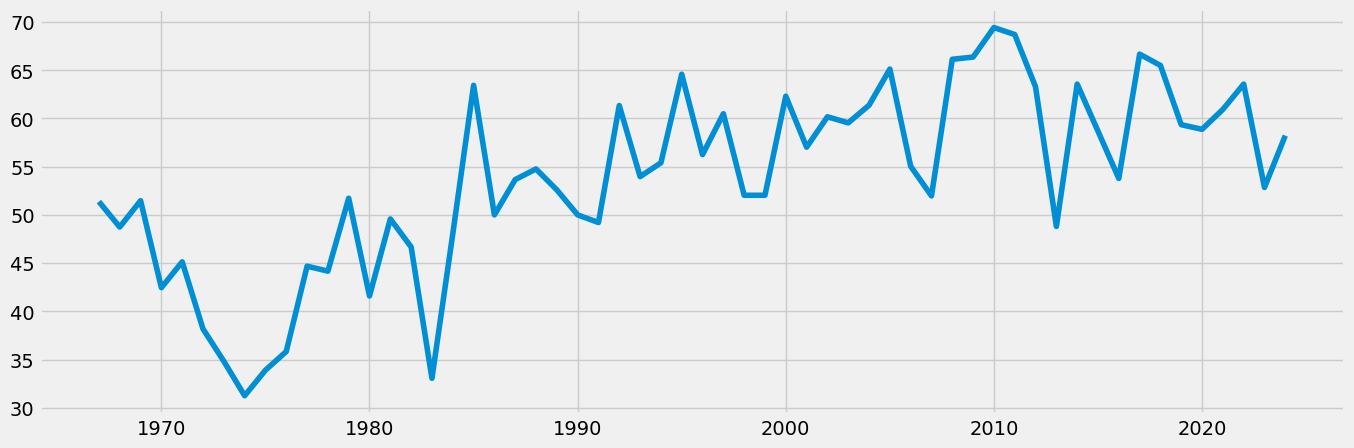

In [177]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_sbs_tseries)

In [178]:
# Check for missing values (you shouldn't have any)

df_sbs_tseries.isnull().sum() 

Pass_%    0
dtype: int64

In [179]:
# Check for duplicates

dups = df_sbs_tseries.duplicated()
dups.sum()

# No dups!

3

In [180]:
dups

datetime
1967-01-01    False
1968-01-01    False
1969-01-01    False
1970-01-01    False
1971-01-01    False
1972-01-01    False
1973-01-01    False
1974-01-01    False
1975-01-01    False
1976-01-01    False
1977-01-01    False
1978-01-01    False
1979-01-01    False
1980-01-01    False
1981-01-01    False
1982-01-01    False
1983-01-01    False
1984-01-01    False
1985-01-01    False
1986-01-01    False
1987-01-01    False
1988-01-01    False
1989-01-01    False
1990-01-01     True
1991-01-01    False
1992-01-01    False
1993-01-01    False
1994-01-01    False
1995-01-01    False
1996-01-01    False
1997-01-01    False
1998-01-01    False
1999-01-01     True
2000-01-01    False
2001-01-01    False
2002-01-01    False
2003-01-01    False
2004-01-01    False
2005-01-01    False
2006-01-01    False
2007-01-01    False
2008-01-01    False
2009-01-01    False
2010-01-01    False
2011-01-01    False
2012-01-01    False
2013-01-01    False
2014-01-01    False
2015-01-01    False
2016-01-01 

#### The 3 dupes were referring to just the 'Pass_%' column - there are no real dupes

<a id='3'></a> <br>
## 3. Time-series analysis: decomposition

In [181]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_sbs_tseries, model='additive')

In [182]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

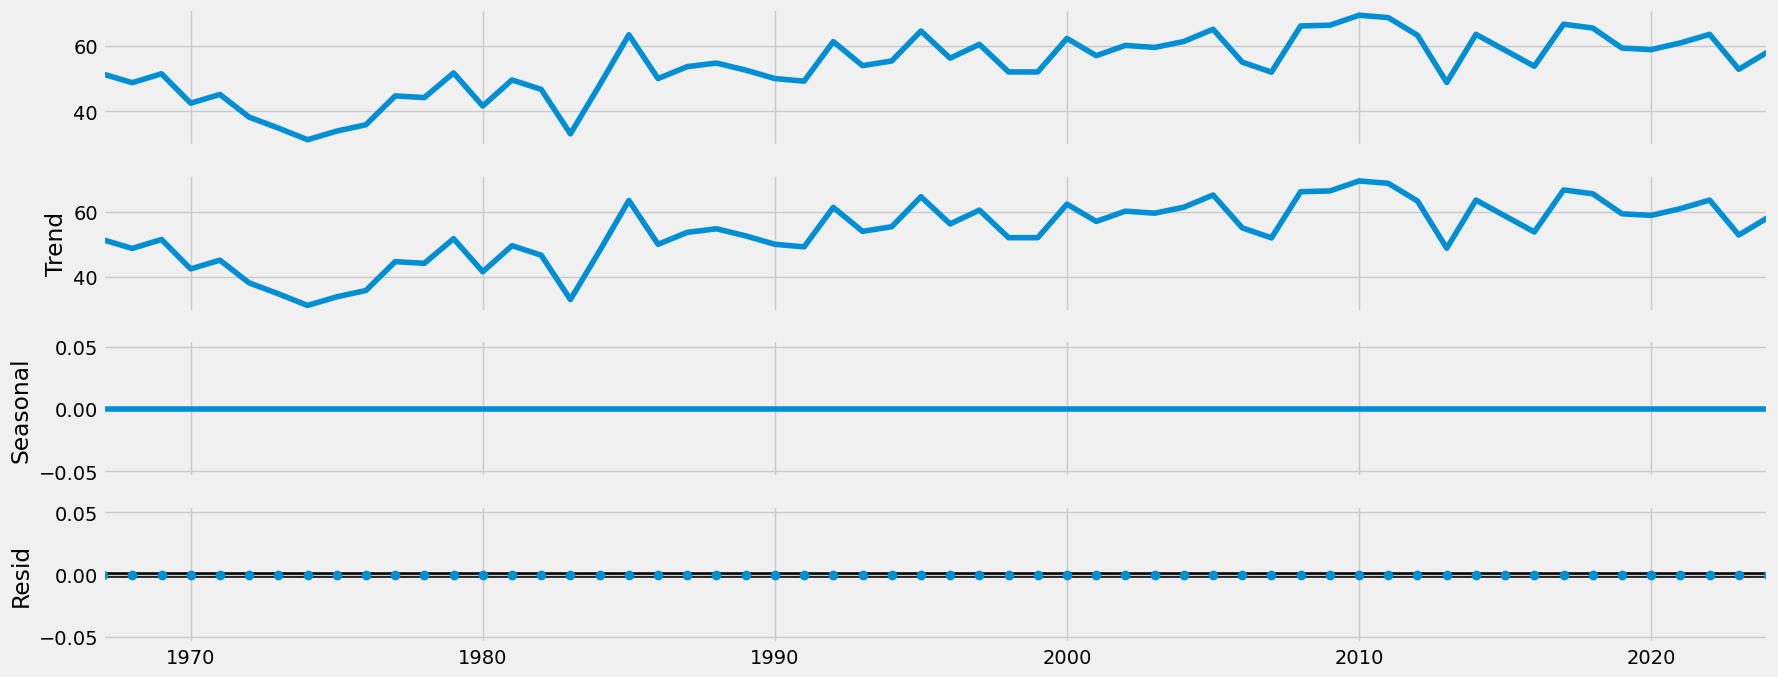

In [183]:
# Plot the separate components

decomposition.plot()
plt.show()

### Decomposition analysis:
>#### - The Level and Trend appear the same which tells me that my data did not need to be "smoothed" and there is very little noise. 
>#### - The Residual line (or Noise) has zero fluctuation which tracks with my comment above.
>#### - Finally, there appears to be no Seasonality to my data (which makes sense as each data point is 1 year apart).

<a id='4'></a> <br>
## 4. Testing for stationarity

In [184]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series

dickey_fuller(df_sbs_tseries['Pass_%'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.471614
p-value                         0.008747
Number of Lags Used            10.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


>### From the Dickey-Fuller test, we can conclude that the dataset IS Stationary. The test is administered to DISPROVE the null hypothesis, which is *the presence of a unit root.* These reulsts do, in fact, disprove the null hypothesis because the Test Statistic (-3.471614) is lower than the Critical Value (5%) of -2.925338. Therefore, we can reject the null hypothesis, conclude the data is Stationary and proceed.

<a id='5'></a> <br>
## 5. Check the Autocorrelations

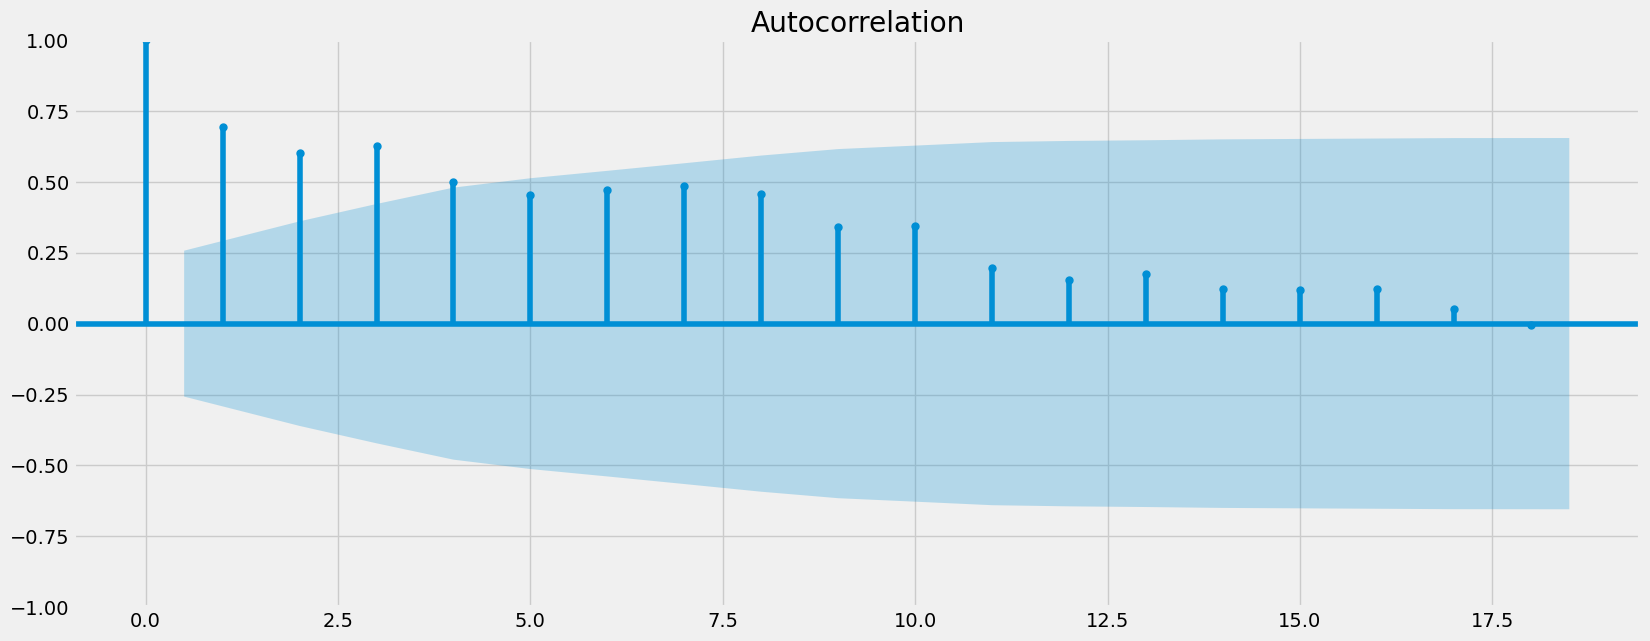

In [185]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_sbs_tseries)
plt.show()

### Only 5 lines are above the confidence level. This means no further actions need to be performed on this data set - no Differencing or Log Transformations. The data set is Stationary and ready for forecasting.